# Cyclistic Bike-Share Analysis Case Study

## Introduction
Welcome to the Cyclistic bike-share analysis case study! In this project, we will analyze the historical trip data of Cyclistic, a bike-share company in Chicago. The goal is to understand how casual riders and annual members use Cyclistic bikes differently and provide insights for designing a new marketing strategy.

## Ask
Our primary task is to answer the question: 
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

The Following shows: data sources description, data cleaning documentation, a summary of analysis, supporting visualizations, and key findings.

#### Loading packages

In [1]:
import numpy as np                          # Library for numerical operations
import math                                 # Library for mathematical operations
import os                                   # Library for OS dependent functionality
import pandas as pd                         # Library for data manipulation and analysis
import seaborn as sns                       # Statistical data visualization
import matplotlib.pyplot as plt             # Plotting library
import matplotlib.ticker as ticker          # Customizing tick locations on plots
from datetime import datetime, timedelta    # Library for datetime operations
%matplotlib inline

import warnings                             # Library for handling warnings
warnings.filterwarnings('ignore')           # Ignore warning messages

## Prepare
### Data Sources
- Cyclistic's historical trip data (from Jan 2023 to Dec 2023) is used for analysis. [Download Here](https://divvy-tripdata.s3.amazonaws.com/index.html) | [License Information](https://divvybikes.com/data-license-agreement)
- Each dataset is a CSV (comma-separated values) file containing details of every ride logged by Cyclistic customers.
- After downloading the source zip files, the first step is to create a folder with appropriate file names.


#### Importing datasets 

- load_datasets function:
    - Loads all CSV files from the specified data_dir (default: 'dataset/')
    - Creates a list of DataFrames (dfs) by reading each CSV file
    - Concatenates all DataFrames in dfs into a single DataFrame
    - Returns the concatenated DataFrame
- cdt = load_datasets():
    - Calls the load_datasets function with default arguments
    - Assigns the returned concatenated DataFrame to the variable cdt

In [3]:
def load_datasets(data_dir='dataset/'):
    """
    Load multiple CSV datasets from a directory and concatenate them into a single DataFrame.

    Parameters:
    - data_dir (str): Directory containing CSV files.

    Returns:
    - pd.DataFrame: Concatenated DataFrame.
    """
    dfs = [pd.read_csv(os.path.join(data_dir, filename)) for filename in os.listdir(data_dir) if filename.endswith('.csv')]
    return pd.concat(dfs, ignore_index=True)

In [4]:
# Load datasets
cdt = load_datasets()

#### Preview Dataset

In summary, these lines of code provide a quick overview and basic information about the cdt DataFrame, including:
- Previewing the first few rows of data
- Summary of the DataFrame structure (columns, data types, memory usage)
- Identifying columns with missing values and the count of missing values
- Getting the number of rows and columns in the DataFrame

This can be helpful for understanding the dataset and identifying any potential issues or necessary data cleaning steps before further analysis or processing.

In [5]:
cdt.head(10)    # Display the first 10 rows of the dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member
5,8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NaN,NaN,NaN,NaN,41.91,-87.63,41.92,-87.65,member
6,C97BBA66E07889F9,electric_bike,2023-04-19 09:35:48,2023-04-19 09:45:00,NaN,NaN,NaN,NaN,41.93,-87.66,41.91,-87.65,member
7,6687AD4C575FF734,electric_bike,2023-04-11 16:13:43,2023-04-11 16:18:41,NaN,NaN,NaN,NaN,42.00,-87.66,41.99,-87.66,member
8,A8FA4F73B22BC11F,electric_bike,2023-04-11 16:29:24,2023-04-11 16:40:23,NaN,NaN,NaN,NaN,41.99,-87.66,42.00,-87.66,member
9,81E158FE63D99994,electric_bike,2023-04-19 17:35:40,2023-04-19 17:36:11,NaN,NaN,NaN,NaN,41.88,-87.65,41.88,-87.65,member


In [6]:
cdt.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [7]:
cdt.isna().sum()    # Check for missing values

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [8]:
cdt.shape   # Check the shape of the dataset

(5719877, 13)

## Data Cleaning and Formatting

This code defines a function clean_and_format_data that performs several data cleaning and formatting operations on the input DataFrame cdt:

- Convert start_station_id and end_station_id columns to string data type.
- Drop rows with missing values using dropna.
- Convert started_at and ended_at columns to datetime format.
- Create new columns Hour, Day, and Month based on the started_at datetime column.
- Calculate the Total_Ride_Time in minutes from started_at and ended_at columns, rounding to 1 decimal place.
- Calculate the Distance in kilometers using the latitude and longitude coordinates, rounding to 2 decimal places.
- Map the Month column to Month_name using a dictionary.

After cleaning and formatting, the updated cdt DataFrame is returned.

The code then calls the clean_and_format_data function with the original cdt DataFrame and assigns the result back to cdt.

Finally, it displays the first few rows of the cleaned DataFrame using cdt.head() and prints a summary of the DataFrame using cdt.info().

In [9]:
def clean_and_format_data(cdt):
    """
    Perform data cleaning and formatting operations on the given DataFrame.

    Parameters:
    - cdt (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Cleaned and formatted DataFrame.
    """
    # Convert station IDs to string
    cdt['start_station_id'] = cdt['start_station_id'].astype(str)
    cdt['end_station_id'] = cdt['start_station_id'].astype(str)

    # Drop missing values
    cdt.dropna(axis=0, inplace=True)

    # Convert datetime columns
    cdt['started_at'] = pd.to_datetime(cdt['started_at'], format="%Y-%m-%d %H:%M:%S")
    cdt['ended_at'] = pd.to_datetime(cdt['ended_at'], format="%Y-%m-%d %H:%M:%S")

    # Create new columns
    cdt['Hour'] = cdt.started_at.apply(lambda x: x.hour)
    cdt['Day'] = cdt.started_at.apply(lambda x: x.day_name())
    cdt['Month'] = cdt.started_at.apply(lambda x: x.month)

    # Calculate ride time and distance
    cdt['Total_Ride_Time'] = (cdt['ended_at'] - cdt['started_at']) / timedelta(minutes=1)
    cdt['Total_Ride_Time'] = cdt['Total_Ride_Time'].round(decimals=1)

    # calculate the ride distance in Kms from given coordinates.
    cdt['Lat'] = (cdt['end_lat'] - cdt['start_lat'])
    cdt['Lng'] = (cdt['end_lng'] - cdt['start_lng'])
    cdt['Distance'] = (np.sqrt((cdt['Lat']**2) + (cdt['Lng']**2))) * 111.32
    cdt['Distance'] = cdt['Distance'].round(decimals=2)

    # Map month names
    month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    cdt['Month_name'] = cdt['Month'].map(month)

    return cdt

In [10]:
# Clean and format data
cdt = clean_and_format_data(cdt)

In [11]:
cdt.head()  # Display the first 5 rows of the cleaned dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance,Month_name
227,5B6500E1E58655C0,classic_bike,2023-04-10 17:34:35,2023-04-10 18:02:36,Avenue O & 134th St,20214,Avenue O & 134th St,20214,41.651868,-87.539671,...,-87.539671,member,17,Monday,4,28.0,0.000000,0.000000,0.00,April
383,AA65D25D69AF771F,classic_bike,2023-04-12 12:29:46,2023-04-12 12:54:00,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,...,-87.606615,member,12,Wednesday,4,24.2,0.000000,0.000000,0.00,April
409,079FB2C196414482,electric_bike,2023-04-13 17:39:23,2023-04-13 17:40:57,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl,TA1306000002,41.862430,-87.651152,...,-87.651062,member,17,Thursday,4,1.6,-0.000052,0.000090,0.01,April
561,599623864C871207,classic_bike,2023-04-29 20:57:10,2023-04-29 20:57:13,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,...,-87.606615,member,20,Saturday,4,0.0,0.000000,0.000000,0.00,April
692,63ECC8A13D11A76A,classic_bike,2023-04-20 17:03:11,2023-04-20 17:24:58,California Ave & Division St,13256,California Ave & Milwaukee Ave,13256,41.903029,-87.697474,...,-87.697153,casual,17,Thursday,4,21.8,0.019666,0.000321,2.19,April


In [12]:
cdt.info()  # Check the data types

<class 'pandas.core.frame.DataFrame'>
Index: 4331953 entries, 227 to 5719869
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Hour                int64         
 14  Day                 object        
 15  Month               int64         
 16  Total_Ride_Time     float64       
 17  Lat                 float64       
 18  Lng                 float64       
 19  Distance            float64       
 20  Month

## Exploratory Data Analysis (EDA)

- Set the Seaborn plotting style to 'whitegrid'.
- Display the first 3 rows of the cdt DataFrame.
- Group the data by member_casual and count the number of rides for each user type, storing the result in cdt_mem_casual.

And finally, The process of data exploration to identify patterns and trends between Cyclistic members and casual riders splits across the following variables:

- Total number of riders for each type
- the average distance covered by each user type
- the average ride time for each user type
- the count of rides for each hour of the day, separated by user type
- the count of rides for each day of the week, separated by user type
- the count of rides for each month, separated by user type
- the count of rides for each ride type (e.g., classic_bike, electric_bike), separated by user type

These plots provide insights into the ride patterns of different user types (casual vs. member) based on various factors such as time of day, day of the week, month, and ride type.

In [13]:
sns.set_style('whitegrid')

In [14]:
cdt.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance,Month_name
227,5B6500E1E58655C0,classic_bike,2023-04-10 17:34:35,2023-04-10 18:02:36,Avenue O & 134th St,20214,Avenue O & 134th St,20214,41.651868,-87.539671,...,-87.539671,member,17,Monday,4,28.0,0.000000,0.00000,0.00,April
383,AA65D25D69AF771F,classic_bike,2023-04-12 12:29:46,2023-04-12 12:54:00,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803038,-87.606615,...,-87.606615,member,12,Wednesday,4,24.2,0.000000,0.00000,0.00,April
409,079FB2C196414482,electric_bike,2023-04-13 17:39:23,2023-04-13 17:40:57,Morgan Ave & 14th Pl,TA1306000002,Morgan Ave & 14th Pl,TA1306000002,41.862430,-87.651152,...,-87.651062,member,17,Thursday,4,1.6,-0.000052,0.00009,0.01,April


In [15]:
#checking total ride of member and casual user
cdt_mem_casual=cdt.groupby("member_casual")["ride_id"].count()   # Group by member_casual and count the number of rides

cdt_mem_casual

member_casual
casual    1531825
member    2800128
Name: ride_id, dtype: int64

#### Total Riders by User Type

In [32]:
# Plot total riders by user type
def plot_user_type_counts(cdt):
    """
    Plot total riders by user type.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    sns.barplot(x=cdt_mem_casual.index, y=cdt_mem_casual.values, palette={'member': 'skyblue', 'casual': 'coral'})
    plt.ylabel("Number of Riders")
    #plt.xlabel("User Type")
    plt.show()

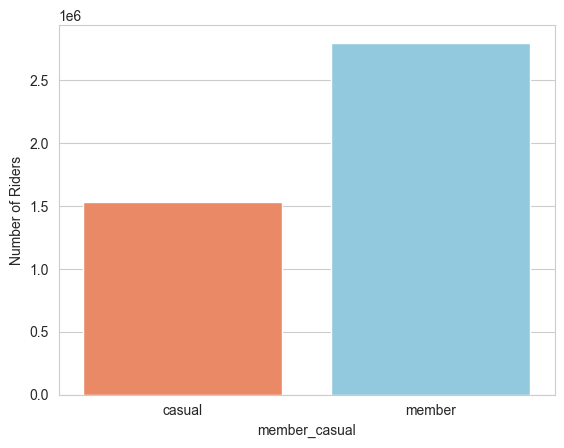

In [33]:
# Plot total riders by user type
plot_user_type_counts(cdt)

- Members: The graph shows that there are more than twice as many member rides (2.8 million) than casual rider trips (1.5 million). 
- Casual Riders: Casual riders make up a significant portion of total ridership (around 35%).

#### Total Distance by User Type

In [18]:
# Plot Distance covered by user type
def plot_user_type_dis(cdt):
    """
    Plot distance by user type.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    sns.barplot(x='member_casual', y='Distance', data=cdt, palette={'member': 'skyblue', 'casual': 'coral'})
    plt.ylabel("Distance")
    #plt.xlabel("User Type")
    plt.show()

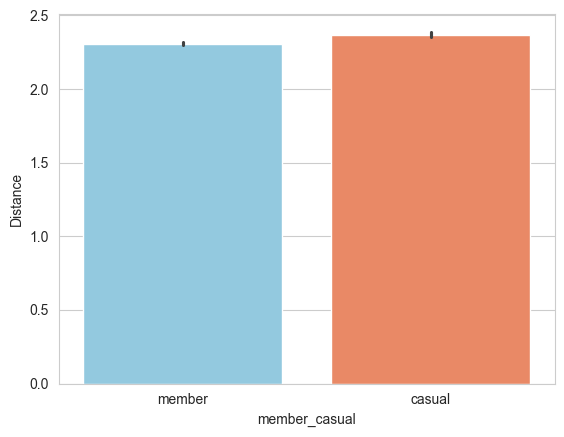

In [19]:
# Plot distance by user type
plot_user_type_dis(cdt)

- members riders have a mean trip distance of ~2.3 kilometers per trip.
- Casual riders have a mean trip distance of ~2.4 kilometers per trip.
- Casual riders have a higher annual mean trip distance traveled.

#### Total Ride Time by User Type

In [20]:
#plot ride time of riders
def plot_ride_time_type(cdt):
    """
    Plot ride time by user type.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    sns.barplot(x='member_casual', y='Total_Ride_Time', data=cdt, palette={'member': 'skyblue', 'casual': 'coral'})
    plt.ylabel("Total Ride Time")
    #plt.xlabel("User Type")
    plt.show()

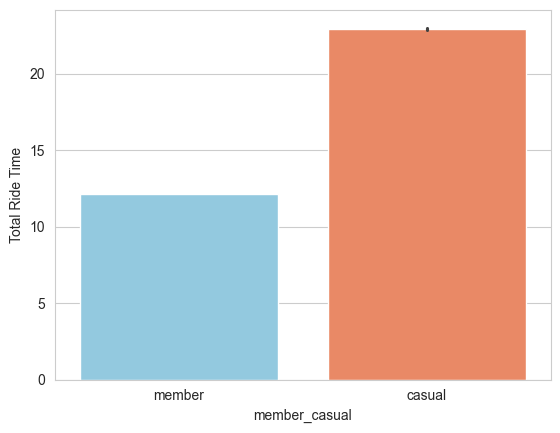

In [21]:
# Plot ride time by user type
plot_ride_time_type(cdt)

- Cyclistic members have a mean trip duration of ~13 minutes.
- Casual riders have a mean trip duration of ~25 minutes.
- Casual riders have a higher annual mean trip duration and distance traveled.

#### Total Trips Taken in a Day

In [22]:
#plot count of rides per hour
def plot_ride_hour(cdt):
    """
    Plot count of rides per hour.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    hour_counts = cdt.groupby(['Hour', 'member_casual']).size().unstack(fill_value=0)
    hour_counts.plot(kind='line', marker='o', color={'member': 'skyblue', 'casual': 'coral'})
    plt.xlabel("Hour")
    plt.ylabel("Count of Rides")
    #plt.title("Count of Rides per Hour")
    plt.legend(title='User Type')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


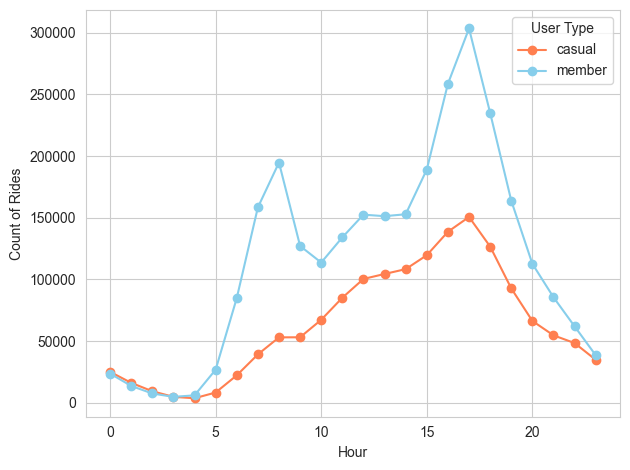

In [23]:
#plot count of rides per hour
plot_ride_hour(cdt)

- Cyclistic members frequented most at 5 PM, with approximately 300,000 trips, and the least at 3 AM, with about 5,000 trips.
- Casual riders frequented most at 5 PM, with approximately 150,000 trips, and the least at 3 AM, with about 5,000 trips.
- Cyclistic members also have a high usage activity at 8 AM, with approximately 200,000 trips.
- Both members and casual users have ascending usage during the day.

#### Total rides per day

In [26]:
#plot count of rides per day

def plot_ride_day(cdt):
    """
    Plot count of rides per day.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

    sns.countplot(x='Day', hue='member_casual', data=cdt, palette={'member': 'skyblue', 'casual': 'coral'}, order=order)
    plt.xlabel("Day")
    plt.ylabel("Count of Rides")
    plt.tight_layout()
    plt.show()

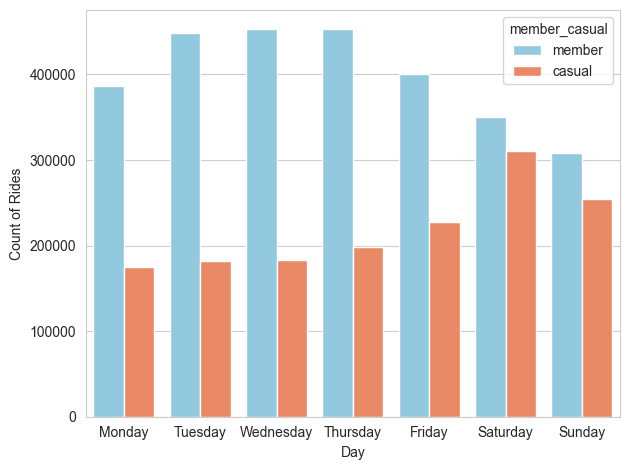

In [27]:
#plot count of rides per day
plot_ride_day(cdt)

- Cyclistic members frequented the most on Wednesdays and Thursdays, with approximately 450,000 trips, and least on Sundays, with about 300,000 trips.
- Casual riders frequented the most on Saturdays, with approximately 300,000 trips, and least on Mondays, with about 197,000 trips.
- On weekdays (Mon-Fri), Cyclistic members have shown higher usage.
- On weekends (Sat-Sun), casual users have shown increasing usage but still lower then members.

#### Total rides per month

In [28]:
# count of Rides per month

def plot_ride_month(cdt):
    """
    Plot count of rides per month.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    plt.figure(figsize=(12,6))
    order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

    sns.countplot(x='Month_name', hue='member_casual', data=cdt, palette={'member': 'skyblue', 'casual': 'coral'}, order=order)
    plt.ylabel("Count of Rides")
    plt.tight_layout()
    plt.show()

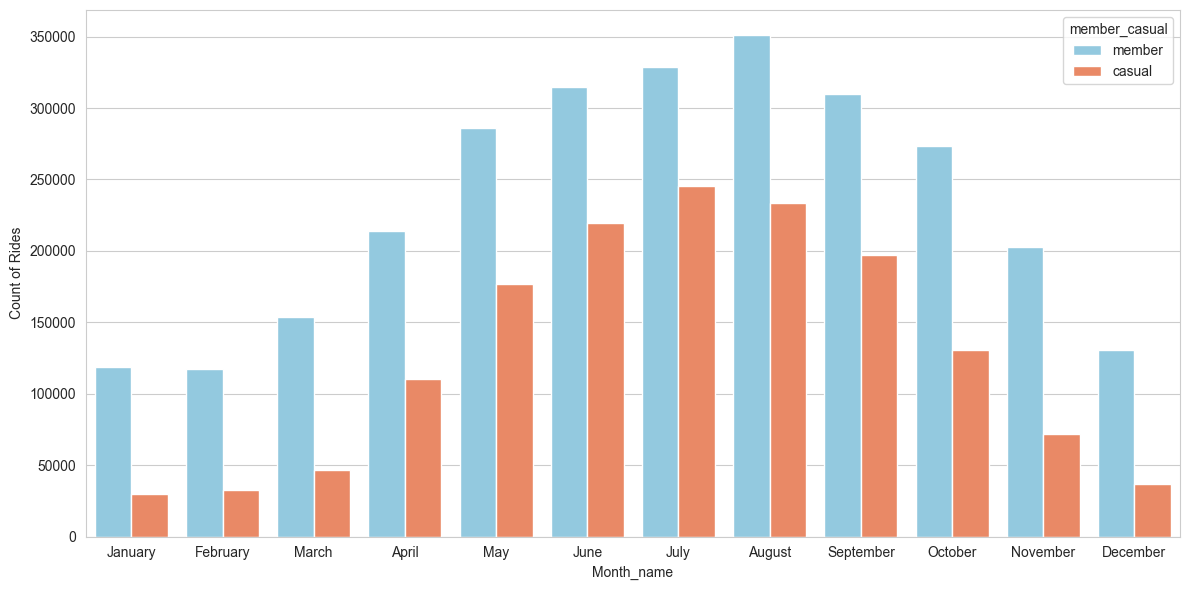

In [29]:
#plot count of rides per month
plot_ride_month(cdt)

- Cyclistic members recorded their highest activity in August 2023, with 350,000 trips, and the lowest in February 2023, with 120,000 trips.
- Casual riders recorded their highest activity in July 2023, with 240,000 trips, and the lowest in January 2023, with 25,000 trips.


#### Total ride type for different user types

In [30]:
#checking total ride count per ride type
def plot_rides_by_ride_type(cdt):
    """
    Plot rides by ride type for different user types.

    Parameters:
    - cdt (pd.DataFrame): DataFrame containing ride data.
    """
    sns.countplot(x='rideable_type', hue='member_casual', data=cdt, palette={'member': 'skyblue', 'casual': 'coral'})
    plt.xlabel("Rideable Type")
    plt.ylabel("Count of Rides")
    plt.tight_layout()
    plt.show()

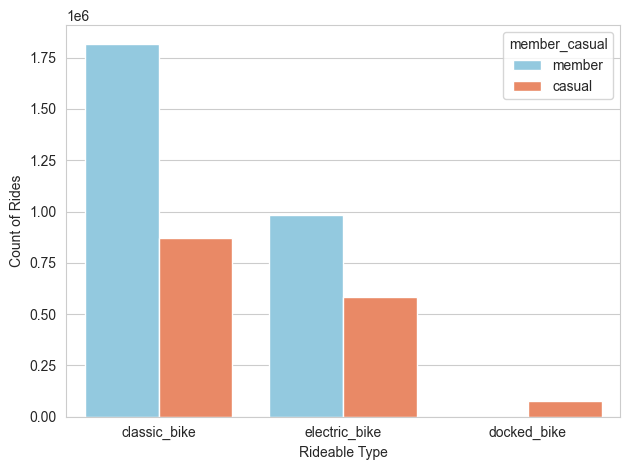

In [31]:
# Plot rides by ride type
plot_rides_by_ride_type(cdt)

- Cyclistic members prefer the classic bicycle to the electric one — of the total trips taken in one year, 1.80 million have been on a classic bicycle. On the other hand, only 0.99 million trips were on electric bicycles.
- Casual riders have also shown a higher preference for classic bicycles — of the total trips taken in one year, 0.85 million have been on a classic bicycle. On the other hand, only 0.55 million trips were on electric bicycles.
- Casual riders have also used the docked bicycles, with 0.15 million trips taken.

## Key Observations

The company's customer base is divided into two distinct user groups: Cyclistic members and casual riders. An analysis of their usage patterns reveals notable differences in how these groups utilize the bike-sharing services.

1. **Membership Advantage**: Cyclistic members account for a significantly higher number of trips compared to casual riders during the year under study. This suggests that members are more frequent users of the bike-sharing services.

2. **Ride Duration and Distance**: Casual riders tend to have longer average trip durations and cover greater distances than Cyclistic members on any given day of the week. This pattern could indicate that casual riders are more likely to use the bike-sharing services for leisure, recreational activities, or exercise, while members primarily use them for commuting or running errands.

3. **Peak Usage Hours**: Both user groups exhibit a peak in activity around 5 PM, potentially indicating a preference for riding during pleasant weather conditions. However, Cyclistic members also demonstrate a secondary peak at 8 AM, which could be attributed to commuting to work.

4. **Weekend Popularity**: Both users experience their busiest periods on weekends, suggesting a higher demand for bike-sharing services for recreational purposes during those days.

5. **Preference for Classic Bikes**: The classic bicycle emerges as the most popular choice among both user types. However, it is noteworthy that docked bicycles seem to be more prevalent among casual riders.

6. **Seasonal Trends**: Both user groups exhibit the highest number of trips during the summer months from May to August. However, there is a noticeable decline in bike-sharing usage from September to February, which could be attributed to changing weather conditions and decreasing temperatures.


## Act

The final part of an analysis is to derive conclusions and take action by recommending solutions depending on the problem statement and the results.

### Recommendations

- Implement targeted promotions for casual riders on weekdays to encourage more uniform usage of the bike-share services throughout the week. Increased exposure to Cyclistic's offerings may also improve the chances of converting casual riders into members.

- Introduce exclusive benefits for Cyclistic members, such as priority access during peak hours and discounted pricing during non-peak times. This could incentivize casual riders to consider an annual membership for enhanced convenience and value.

- Expand membership options by introducing short-term plans like one-week or one-month memberships. However, pricing these plans strategically higher than the annual membership cost over 12 months could encourage more casual riders to opt for the annual plan, ultimately driving long-term commitment.

- Collaborate with organizations and companies to promote bike usage and offer various membership schemes, such as a 12+1 month promotion for annual membership purchases. Such partnerships could increase visibility and incentivize new member acquisitions.

- Implement group discounts or family plans for annual memberships, making it more attractive for friends, students, and families to join the Cyclistic community together. This could foster a sense of community and encourage word-of-mouth promotion.

These recommendations aim to address the key findings from the analysis, focusing on strategies to retain and convert casual riders into members, while also enhancing the overall customer experience and value proposition for Cyclistic members.


In [34]:
cdt.to_csv('cyclistic_dataset.csv', index=False)

print("Dataset exported as CSV file successfully.")

Dataset exported as CSV file successfully.
